This notebook is an updated version of determination of feedbacks, where CO2 concentration is used instead of CO2 increase, and temperature instead of temperature increase. This is so the feedback values are better representated in regards to accuracy of the feedback equations from Friedlingstein (2006) and better result variations from ratio determinations.

In [33]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

# Load CO2 and temperature data

In [34]:
df = pd.read_csv('./../../data/CO2/co2_global.csv')
df.tail()

,Year,CO2
56,2013,393.4350
57,2014,395.6510
58,2015,397.8860
59,2016,400.1300
60,2017,403.5225


In [35]:
year = df['Year']
co2 = df['CO2']

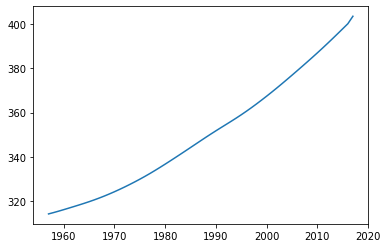

In [36]:
plt.plot(year, co2)

In [37]:
uptake_df = pd.read_csv('./../../data/GCP/budget.csv')
uptake_df.tail()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
55,2014,9.690455,1.601503,4.3248,2.556489,3.803287,0.607382
56,2015,9.678697,1.623192,6.1904,2.580257,1.837847,0.693385
57,2016,9.736654,1.300139,6.0420,2.636438,2.577243,-0.218888
58,2017,9.867157,1.388418,4.6428,2.506476,3.782197,0.324101
59,2018,9.981647,1.508849,5.1400,2.628250,3.468828,0.253418


In [38]:
temp_df = pd.read_csv('./../../data/temp/temp_anomaly.csv')
temp_df.head()

,Entity,Year,Median,Upper,Lower
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


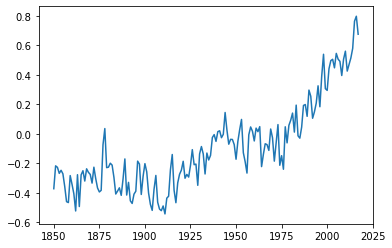

In [39]:
temp_global = temp_df[temp_df['Entity']=='Global']
plt.plot(temp_global.Year, temp_global.Median)

In [40]:
temp_med=temp_global.Median[109:].reset_index(drop=True)

### Create variables of carbon cycle and temperature

In [41]:
ocean = uptake_df['ocean sink']
land = uptake_df['land sink']
total_uptake = ocean + land

temp_global = temp_df[temp_df['Entity']=='Global']
temp_global = temp_global[['Year', 'Median']][108:168]

## Generator to produce equally-sized chunks

In [42]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

# CO2 Feedback

In [43]:
co2 = co2[0:59] #1959-2017
total_uptake = total_uptake[:-1]
year = year[2:]

### Plots of uptake and CO2 increase

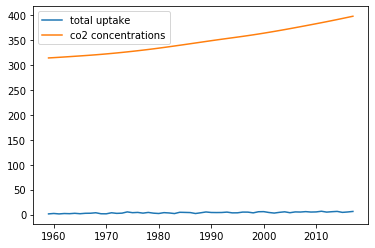

In [48]:
plt.plot(year, total_uptake)
plt.plot(year, co2)
plt.legend(['total uptake', 'co2 concentrations'])

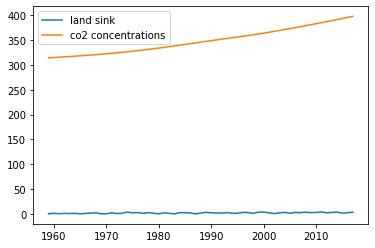

In [52]:
plt.plot(year, land[:-1])
plt.plot(year, co2)
plt.legend(['land sink', 'co2 concentrations'])

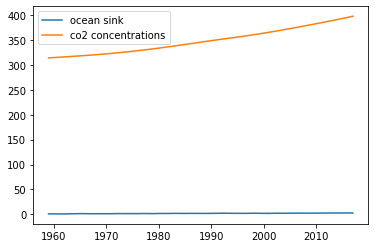

In [53]:
plt.plot(year, ocean[:-1])
plt.plot(year, co2)
plt.legend(['ocean sink', 'co2 concentrations'])

### Plots of feedback (uptake/co2 increase)

LinregressResult(slope=0.00014349620030430757, intercept=-0.27428982108206595, rvalue=0.7001746470030412, pvalue=6.750748038511065e-10, stderr=1.9381060492731226e-05)

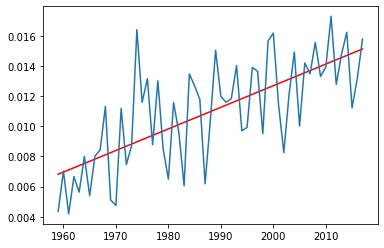

In [67]:
regg = stats.linregress(year, total_uptake/co2)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], total_uptake/co2)
regg

In [74]:
len(year), len(land/co2)

(59, 60)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

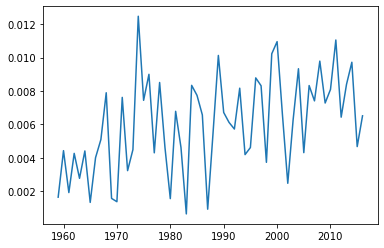

In [76]:
regg = stats.linregress(year, land[:-1]/co2[:-1])
slope = regg[0]
intercept = regg[1]

plt.plot(year, slope*year+intercept, color='r')
plt.plot(year, land[:-1]/co2[:-1])
regg

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

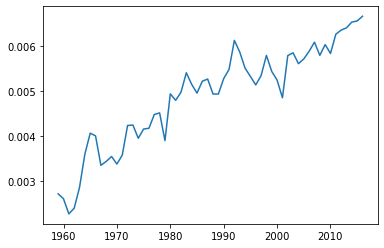

In [77]:
regg = stats.linregress(year, ocean[:-1]/co2[:-1])
slope = regg[0]
intercept = regg[1]

plt.plot(year, slope*year+intercept, color='r')
plt.plot(year, ocean[:-1]/co2[:-1])
regg

### 25-year average of CO2 feedbacks

In [78]:
beta_total = total_uptake/co2
b_total_mean = []
for i in chunks(beta_total,20):
    b_total_mean.append(np.mean(i))

b_total_increase = []
for j in range(2):
    b_total_increase.append(
        (b_total_mean[j+1]-b_total_mean[j])/b_total_mean[j]*100
    )

b_total_mean, b_total_increase

([0.008463059647285148, 0.010902592440880066, 0.013712833709876143],
 [28.82565992994617, 25.775899486610836])

In [79]:
beta_land = land/co2
b_land_mean = []
for i in chunks(beta_land,20):
    b_land_mean.append(np.mean(i))

b_land_increase = []
for j in range(2):
    b_land_increase.append(
        (b_land_mean[j+1]-b_land_mean[j])/b_land_mean[j]*100
    )

b_land_mean, b_land_increase

([0.0048879472488299516, 0.005686776280287931, 0.007754763993078781],
 [16.342832497817945, 36.364850855116536])

In [80]:
beta_ocean = ocean/co2
b_ocean_mean = []
for i in chunks(beta_ocean,20):
    b_ocean_mean.append(np.mean(i))

b_ocean_increase = []
for j in range(2):
    b_ocean_increase.append(
        (b_ocean_mean[j+1]-b_ocean_mean[j])/b_ocean_mean[j]*100
    )

b_ocean_mean, b_ocean_increase

([0.003575112398455197, 0.005215816160592136, 0.0059580697167973635],
 [45.89236866639174, 14.230822815675351])

# Climate Change (Temperature) feedback

### Plots of uptake and temperature increase

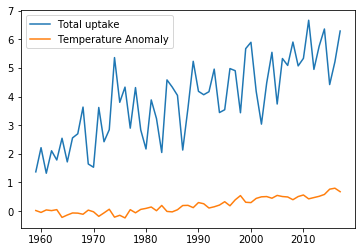

In [81]:
plt.plot(year[0:59], total_uptake)
plt.plot(year[0:59], temp_med)
plt.legend(['Total uptake', 'Temperature Anomaly'])

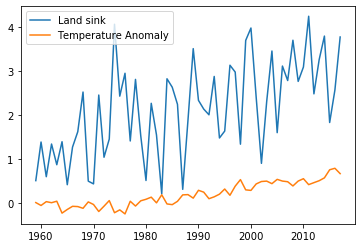

In [83]:
plt.plot(year, land[:-1])
plt.plot(year, temp_med)
plt.legend(['Land sink', 'Temperature Anomaly'])

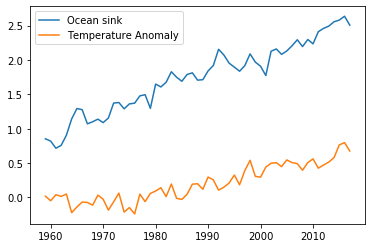

In [84]:
plt.plot(year, ocean[:-1])
plt.plot(year, temp_med)
plt.legend(['Ocean sink', 'Temperature Anomaly'])

### Plots of feedback (uptake/temperature increase)

LinregressResult(slope=0.06218681726648431, intercept=-114.87160198276139, rvalue=0.0151387193295309, pvalue=0.9093953991725964, stderr=0.5440289279693268)

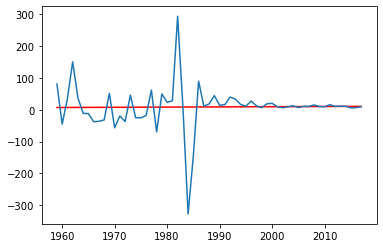

In [85]:
regg = stats.linregress(year, total_uptake/temp_med)
slope = regg[0]
intercept = regg[1]

plt.plot(year, slope*year+intercept, color='r')
plt.plot(year, total_uptake/temp_med)
regg

LinregressResult(slope=0.08754081598902332, intercept=-170.6904113997907, rvalue=0.037548206561158204, pvalue=0.7776813698544311, stderr=0.3085869807985636)

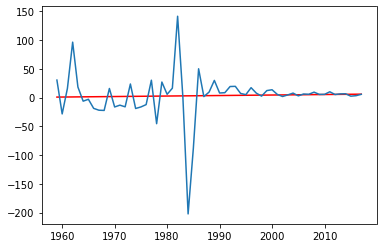

In [87]:
regg = stats.linregress(year, land[:-1]/temp_med)
slope = regg[0]
intercept = regg[1]

plt.plot(year, slope*year+intercept, color='r')
plt.plot(year, land[:-1]/temp_med)
regg

LinregressResult(slope=-0.025353998722539052, intercept=55.81880941702941, rvalue=-0.013840942934369166, pvalue=0.9171340138092532, stderr=0.2426061215290279)

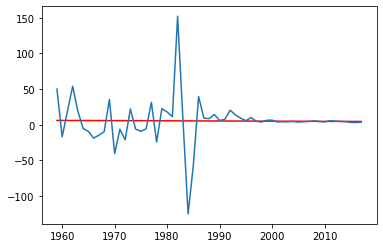

In [89]:
regg = stats.linregress(year, ocean[:-1]/temp_med)
slope = regg[0]
intercept = regg[1]

plt.plot(year, slope*year[0:59]+intercept, color='r')
plt.plot(year,ocean[:-1]/temp_med)
regg

### 25-year average of climate feedbacks

In [90]:
gamma_total = total_uptake/temp_med
g_total_mean = []
for i in chunks(gamma_total,20):
    g_total_mean.append(np.mean(i))
g_total_mean

[1.7544396760093997, 13.687618494389904, 10.93423633839844]

In [91]:
gamma_land = land/temp_med
g_land_mean = []
for i in chunks(gamma_land,20):
    g_land_mean.append(np.mean(i))
g_land_mean

[-0.4712114774620623, 4.327506625466617, 6.3145901808832114]

In [92]:
gamma_ocean = ocean/temp_med
g_ocean_mean = []
for i in chunks(gamma_ocean,20):
    g_ocean_mean.append(np.mean(i))
g_ocean_mean

[2.2256511534714614, 9.360111868923283, 4.619646157515226]

# Linear Regression to determine parameters

Perform linear regression to determine the parameters by finding the gradient of the regression.

In [94]:
# Beta-land (land uptake vs. co2 concentration)
reg_bl = stats.linregress(co2[:-1], land[:-1])
slope = reg_bl[0]
intercept = reg_bl[1]

plt.plot(co2,slope*co2+intercept, color='r')
plt.scatter(co2, land)
reg_bl

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 58 and the array at index 1 has size 59

LinregressResult(slope=0.01815890188911804, intercept=-4.685393827286652, rvalue=0.9574184881481425, pvalue=1.9324799901251613e-32, stderr=0.0007252750308275326)

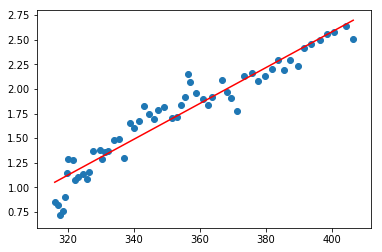

In [32]:
# Beta-ocean (ocean uptake vs. co2 concentration)
reg_bo = stats.linregress(co2, ocean)
slope = reg_bo[0]
intercept = reg_bo[1]

plt.plot(co2,slope*co2+intercept, color='r')
plt.scatter(co2, ocean)
reg_bo

LinregressResult(slope=1.3479422916104729, intercept=1.8836046471102623, rvalue=0.3325729390976495, pvalue=0.010064767116509747, stderr=0.50628418758699)

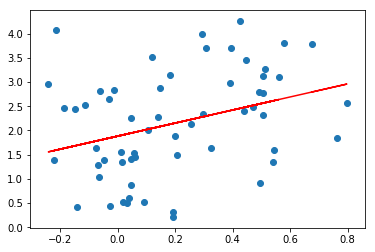

In [33]:
# Gamma-land (land uptake vs. temperature)
reg_gl = stats.linregress(temp_med, land)
slope = reg_gl[0]
intercept = reg_gl[1]

plt.plot(temp_med,slope*temp_med+intercept, color='r')
plt.scatter(temp_med, land)
reg_gl

LinregressResult(slope=1.6221925828438928, intercept=1.408643485885849, rvalue=0.8519089071060265, pvalue=1.1917870845737993e-17, stderr=0.13208275041028447)

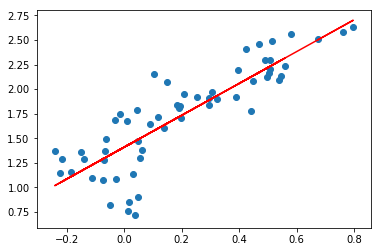

In [34]:
# Gamma-ocean (ocean uptake vs. temperature)
reg_go = stats.linregress(temp_med, ocean)
slope = reg_go[0]
intercept = reg_go[1]

plt.plot(temp_med,slope*temp_med+intercept, color='r')
plt.scatter(temp_med, ocean)
reg_go

# Ordinary Least Squares (Multiple) Regression to determine parameters

Perform Ordinary Least Squares regression to determine the parameters in conjuction with each other (land and ocean still separate).

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Land uptake

In [36]:
x = np.column_stack((co2,temp_med))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(land,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              land sink   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     44.36
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.85e-12
Time:                        14:13:03   Log-Likelihood:                -59.985
No. Observations:                  59   AIC:                             126.0
Df Residuals:                      56   BIC:                             132.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3896      2.966     -7.886      0.000     -29.331     -17.448
x1             0.0755      0.009      8.527      0.000       0.058       0.093
x2            -5.6632      0.889     -6.373      0.000      -7.443      -3.883
==============================================================================
Omnibus:                        1.432   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.370
Skew:                          -0.258   Prob(JB):                        0.504
Kurtosis:                       2.461   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ocean uptake

In [37]:
x = np.column_stack((co2,temp_med))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(ocean, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ocean sink   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     343.8
Date:                Wed, 15 May 2019   Prob (F-statistic):           3.55e-32
Time:                        14:13:03   Log-Likelihood:                 32.873
No. Observations:                  59   AIC:                            -59.75
Df Residuals:                      56   BIC:                            -53.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0632      0.615     -9.864      0.000      -7.295      -4.832
x1             0.0223      0.002     12.164      0.000       0.019       0.026
x2            -0.4506      0.184     -2.447      0.018      -0.820      -0.082
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.610
Skew:                           0.129   Prob(JB):                        0.737
Kurtosis:                       2.573   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regression between CO2 concentrations and temperature anomaly.

This will determine a value of alpha (Friedlingstein et al., 2006) which is the linear transient climate sensitivity to CO2 (in K/ppm).

LinregressResult(slope=0.009216697316711103, intercept=-3.057710325744691, rvalue=0.9253303458869672, pvalue=1.1157870697118918e-25, stderr=0.0005002254575832571)

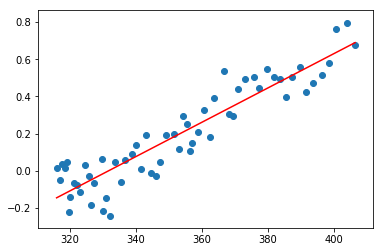

In [38]:
reg = stats.linregress(co2, temp_med)
slope = reg[0]
intercept = reg[1]

plt.plot(co2,slope*co2+intercept, color='r')
plt.scatter(co2, temp_med)
reg